# 데이터 마이닝 중간 과제

데이터 출처 : https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/data

In [61]:
# 데이터 분석에 필요한 패키지 import
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

In [62]:
warnings.filterwarnings('ignore')

# 데이터 불러오기
data = pd.read_csv("C:/Users/daily/Downloads/bank_transactions_data_2.csv")

# 데이터 변수 정보 확인
print('----------- data info -----------')
print(data.info())
print('')

# CustomerAge 변수를 구간화
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 100]
labels = ['Under 10', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', 'Over 90']
data['AgeGroup'] = pd.cut(data['CustomerAge'], bins=bins, labels=labels, right=True)

# CustomerAge를 AgeGroup으로 대체
data.drop('CustomerAge', axis = 1, inplace= True)
data['AgeGroup'].astype('category')

# 기초 통계량 출력
print('----------- data describe -----------')
desc = data.describe()
print(desc)

----------- data info -----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int

# 수치형 변수 분석

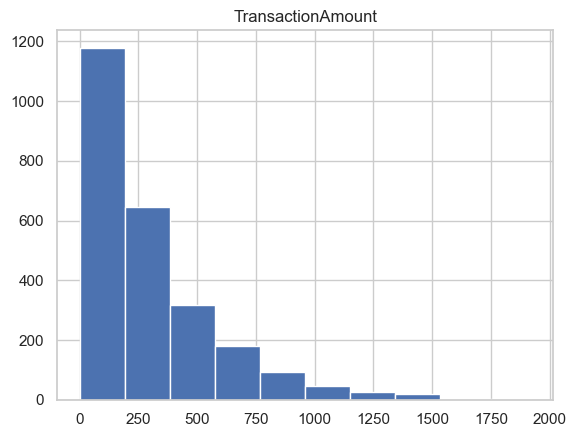

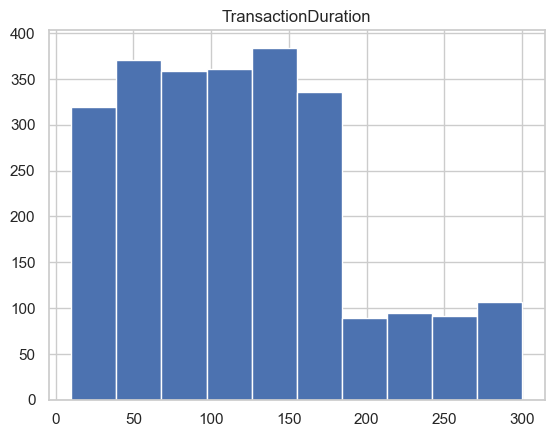

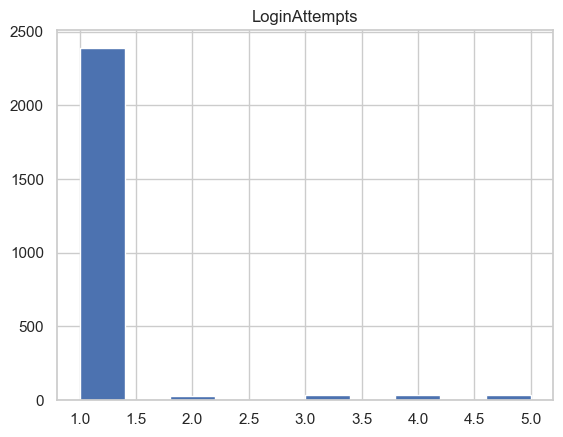

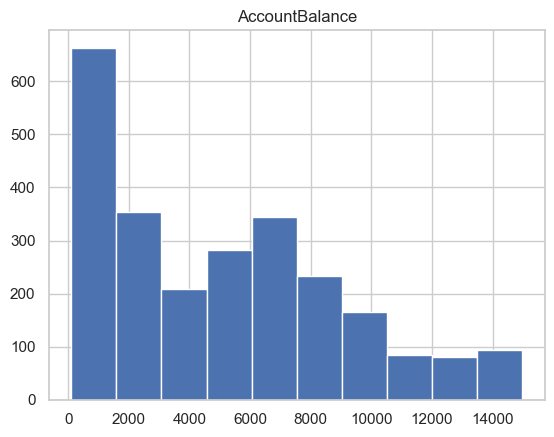

In [63]:
# 수치형 데이터의 분포를 히스토그램으로 확인

continual = ['TransactionAmount', 'TransactionDuration', 
             'LoginAttempts', 'AccountBalance']

for i in continual:
    plt.title(i)
    plt.hist(data[i])
    plt.show()

# 스케일링 전 공분산 확인

----- correlation matrix -----
                     TransactionAmount  TransactionDuration  LoginAttempts  \
TransactionAmount             1.000000             0.004359      -0.008445   
TransactionDuration           0.004359             1.000000       0.032639   
LoginAttempts                -0.008445             0.032639       1.000000   
AccountBalance               -0.025165             0.005577       0.014999   

                     AccountBalance  
TransactionAmount         -0.025165  
TransactionDuration        0.005577  
LoginAttempts              0.014999  
AccountBalance             1.000000  

----- covariance matrix -----
                     TransactionAmount  TransactionDuration  LoginAttempts  \
TransactionAmount         85232.609025            89.041404      -1.485935   
TransactionDuration          89.041404          4894.927283       1.376202   
LoginAttempts                -1.485935             1.376202       0.363202   
AccountBalance           -28659.468379       

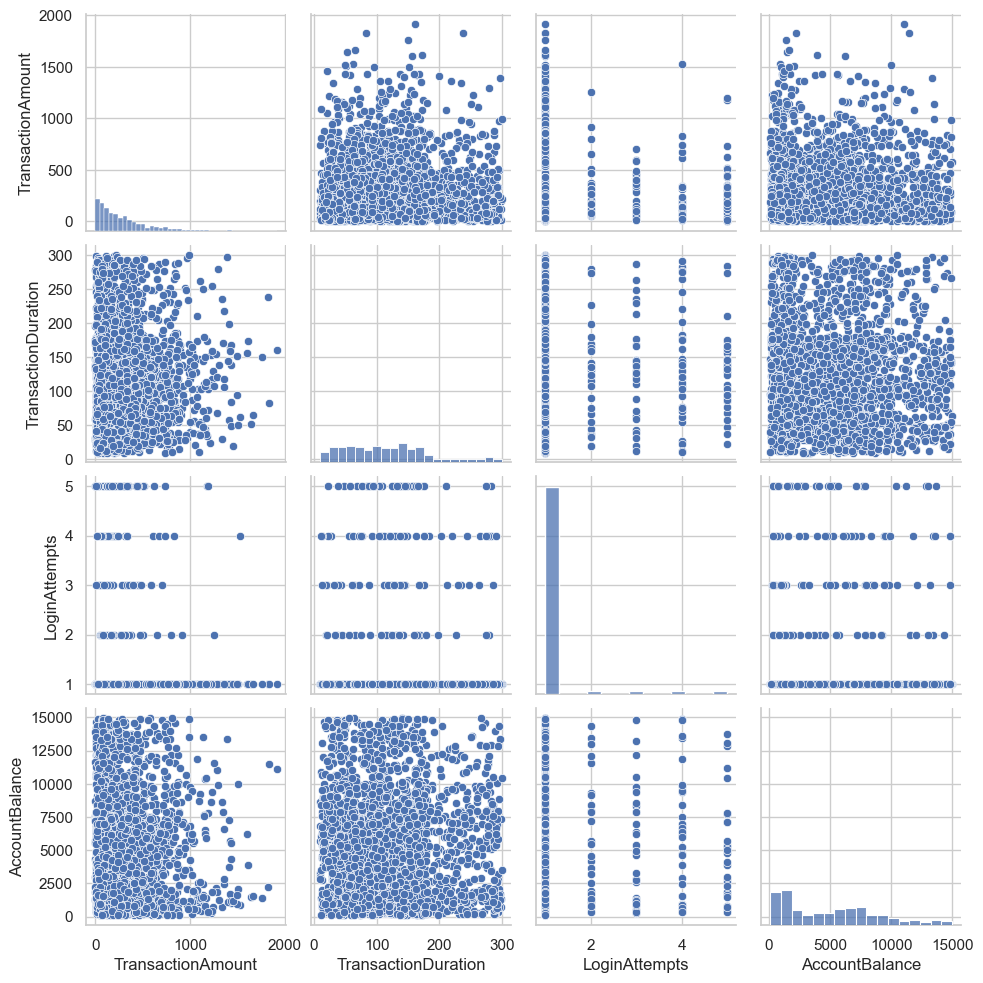

In [64]:
numeric_col = data[['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']]

# 공분산 행렬 계산
corr_matrix = numeric_col.corr()
cov_matrix = numeric_col.cov()

# 결과 출력
print('----- correlation matrix -----')
print(corr_matrix)
print('\n----- covariance matrix -----')
print(cov_matrix)

# 변수들의 산점도 확인
sns.pairplot(numeric_col)
plt.show()

# Standard 스케일링 후 공분산 확인

----- correlation matrix -----
                     TransactionAmount  TransactionDuration  LoginAttempts  \
TransactionAmount             1.000000             0.004359      -0.008445   
TransactionDuration           0.004359             1.000000       0.032639   
LoginAttempts                -0.008445             0.032639       1.000000   
AccountBalance               -0.025165             0.005577       0.014999   

                     AccountBalance  
TransactionAmount         -0.025165  
TransactionDuration        0.005577  
LoginAttempts              0.014999  
AccountBalance             1.000000  

----- covariance matrix -----
                     TransactionAmount  TransactionDuration  LoginAttempts  \
TransactionAmount             1.000398             0.004361      -0.008449   
TransactionDuration           0.004361             1.000398       0.032652   
LoginAttempts                -0.008449             0.032652       1.000398   
AccountBalance               -0.025175       

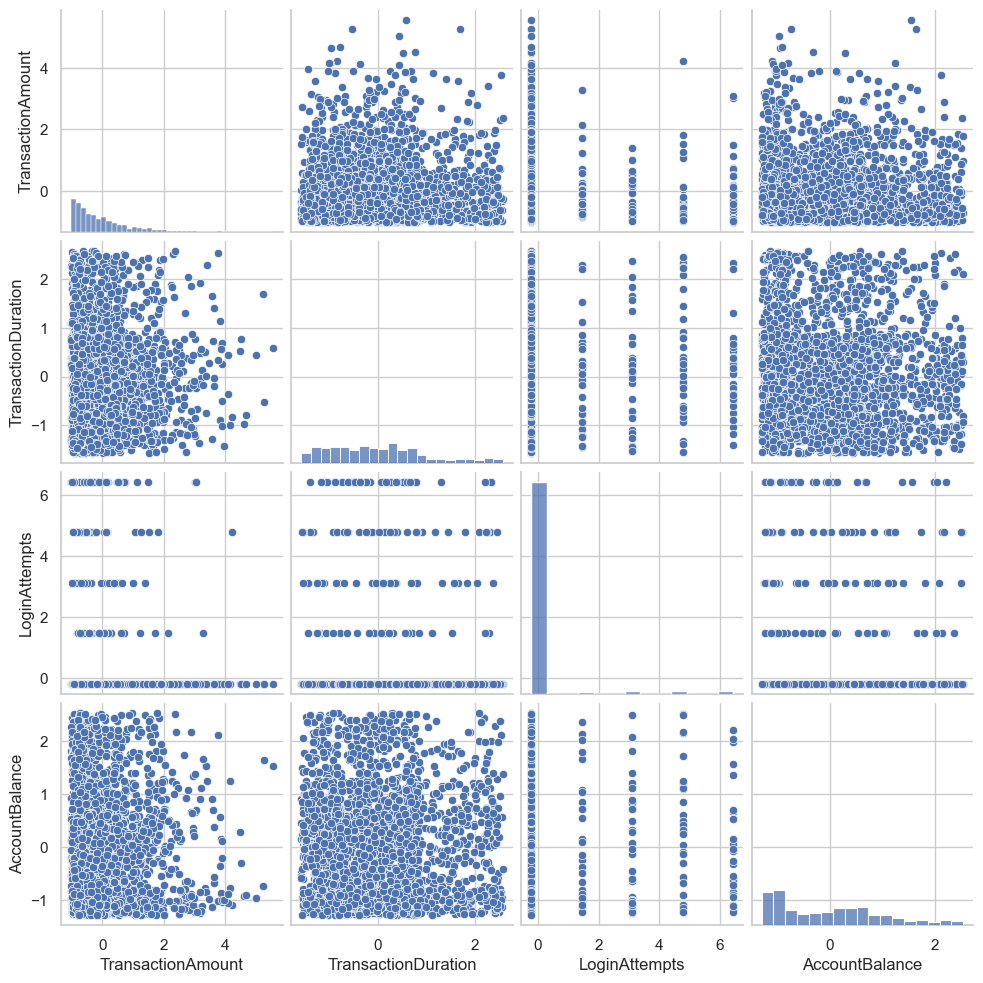

In [65]:
# min-max 스케일링 수행

from sklearn.preprocessing import StandardScaler

# 수치형 데이터프레임
numeric_col = data[['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']]

# 표준화 수행
scaler = StandardScaler()
scaled_array = scaler.fit_transform(numeric_col)

# 결과를 데이터프레임으로 변환 (컬럼명 유지)
scaled_df = pd.DataFrame(scaled_array, columns=numeric_col.columns)

# 스케일링한 데이터로 교체
new_data = data.drop(columns = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance'])
scaled_data = pd.concat([new_data, scaled_df], axis = 1)

# 수치형 변수 선정
numeric_df = scaled_data[['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']]

# 공분산 행렬 계산
scaled_corr_matrix = numeric_df.corr()
scaled_cov_matrix = numeric_df.cov()

# 결과 출력
print('----- correlation matrix -----')
print(scaled_corr_matrix)
print('\n----- covariance matrix -----')
print(scaled_cov_matrix)

# 변수들의 산점도 확인
sns.pairplot(numeric_df)
plt.show()

# PCA 검정

Explained Variance Ratio: [0.26074641 0.254551   0.24345147 0.24125112]
Cumulative Variance: [0.26074641 0.51529741 0.75874888 1.        ]


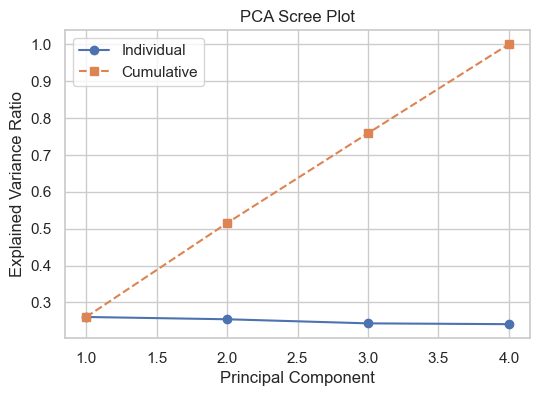

In [66]:
from sklearn.decomposition import PCA

# 1. 수치형 데이터 준비
numeric_df = data[['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']]

# 2. 표준화
scaler = StandardScaler()
scaled = scaler.fit_transform(numeric_df)

# 3. PCA 적용
pca = PCA()
pca.fit(scaled)

# 4. 설명된 분산 비율 출력
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)
print("Cumulative Variance:", explained_variance.cumsum())

# Scree plot (주성분별 설명력)
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', label='Individual')
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='s', linestyle='--', label='Cumulative')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Scree Plot')
plt.legend()
plt.grid(True)
plt.show()

# 범주형 변수 분석

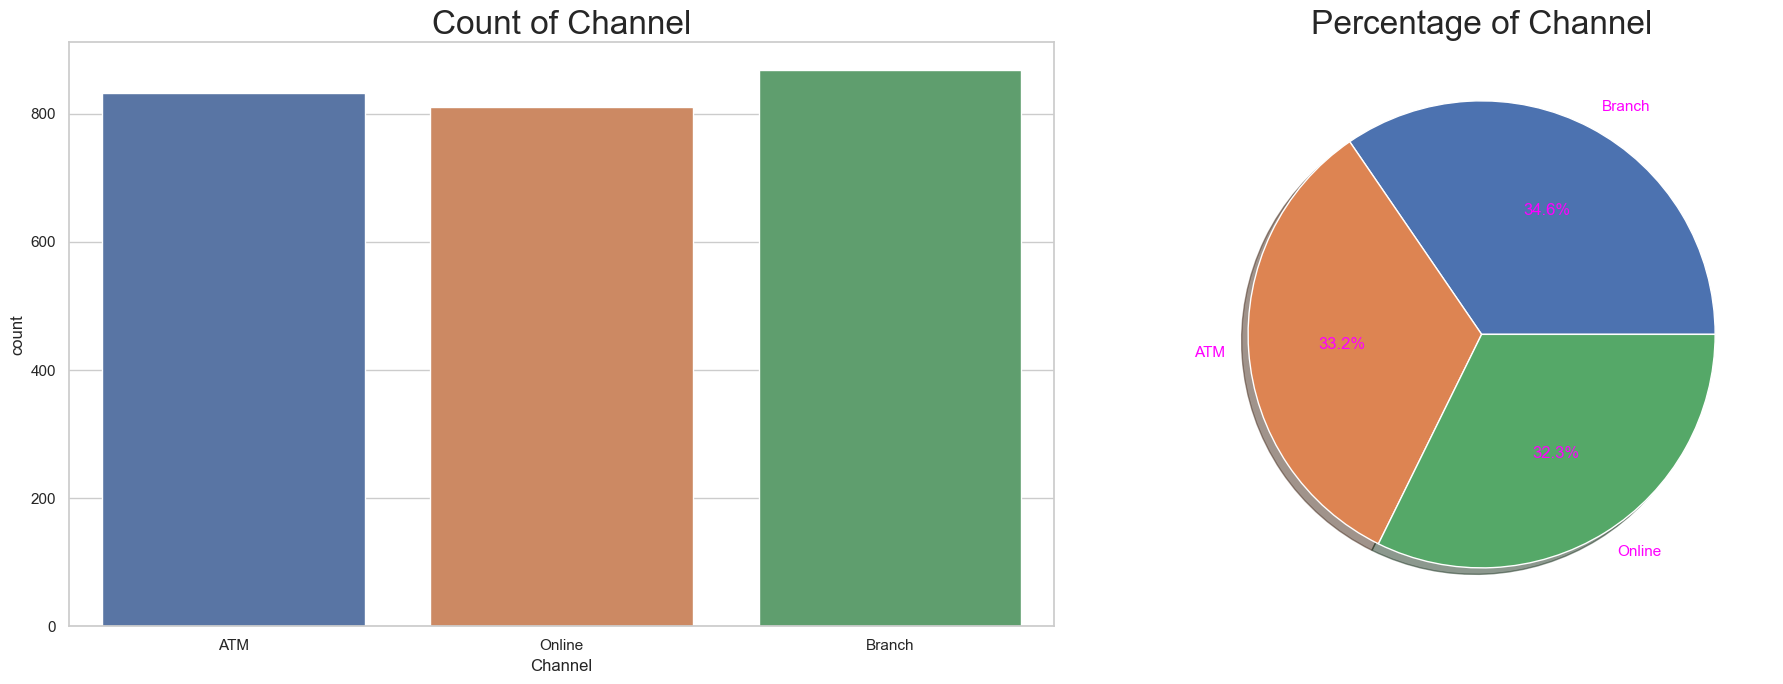

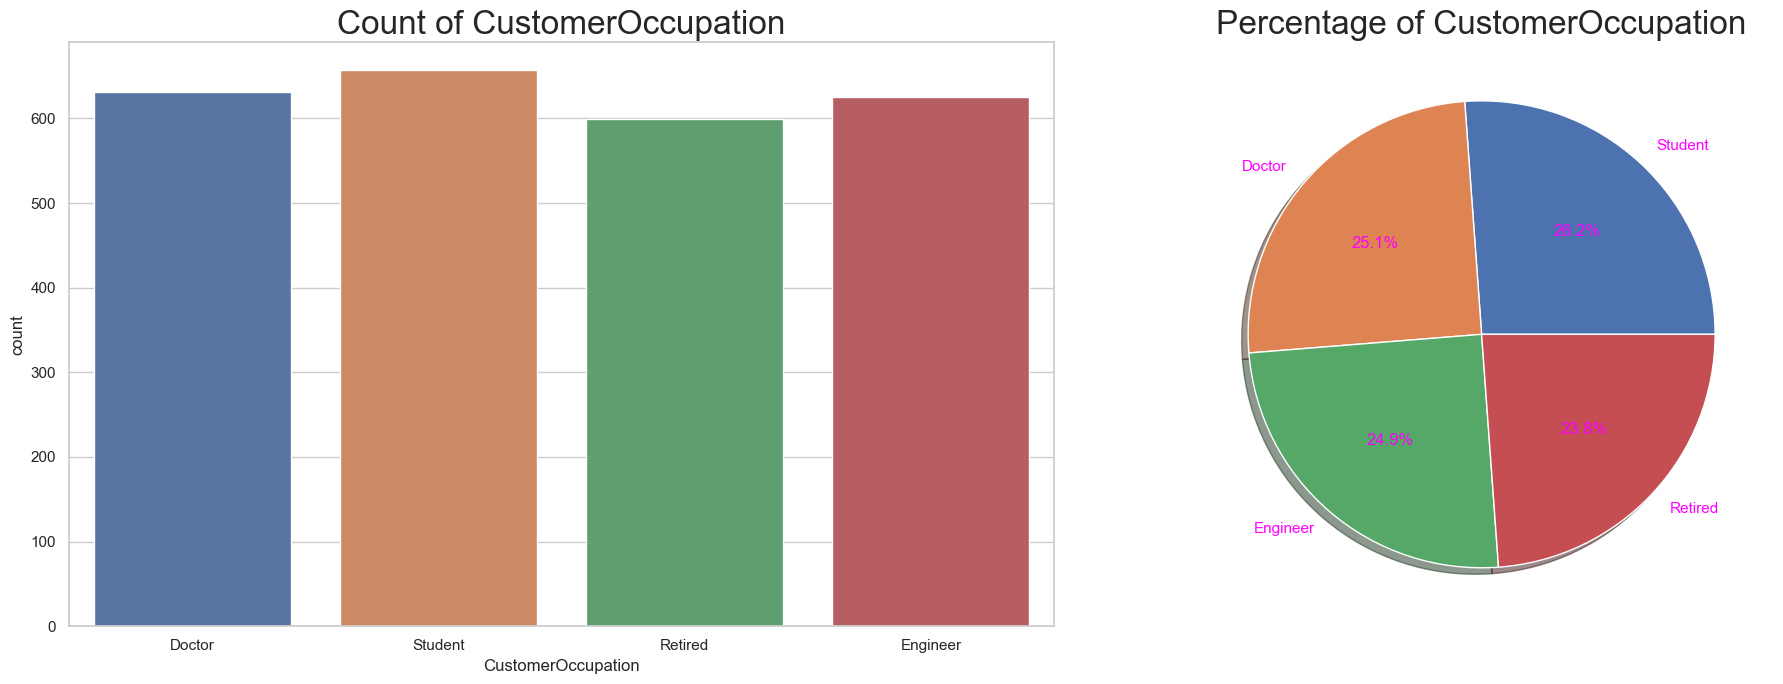

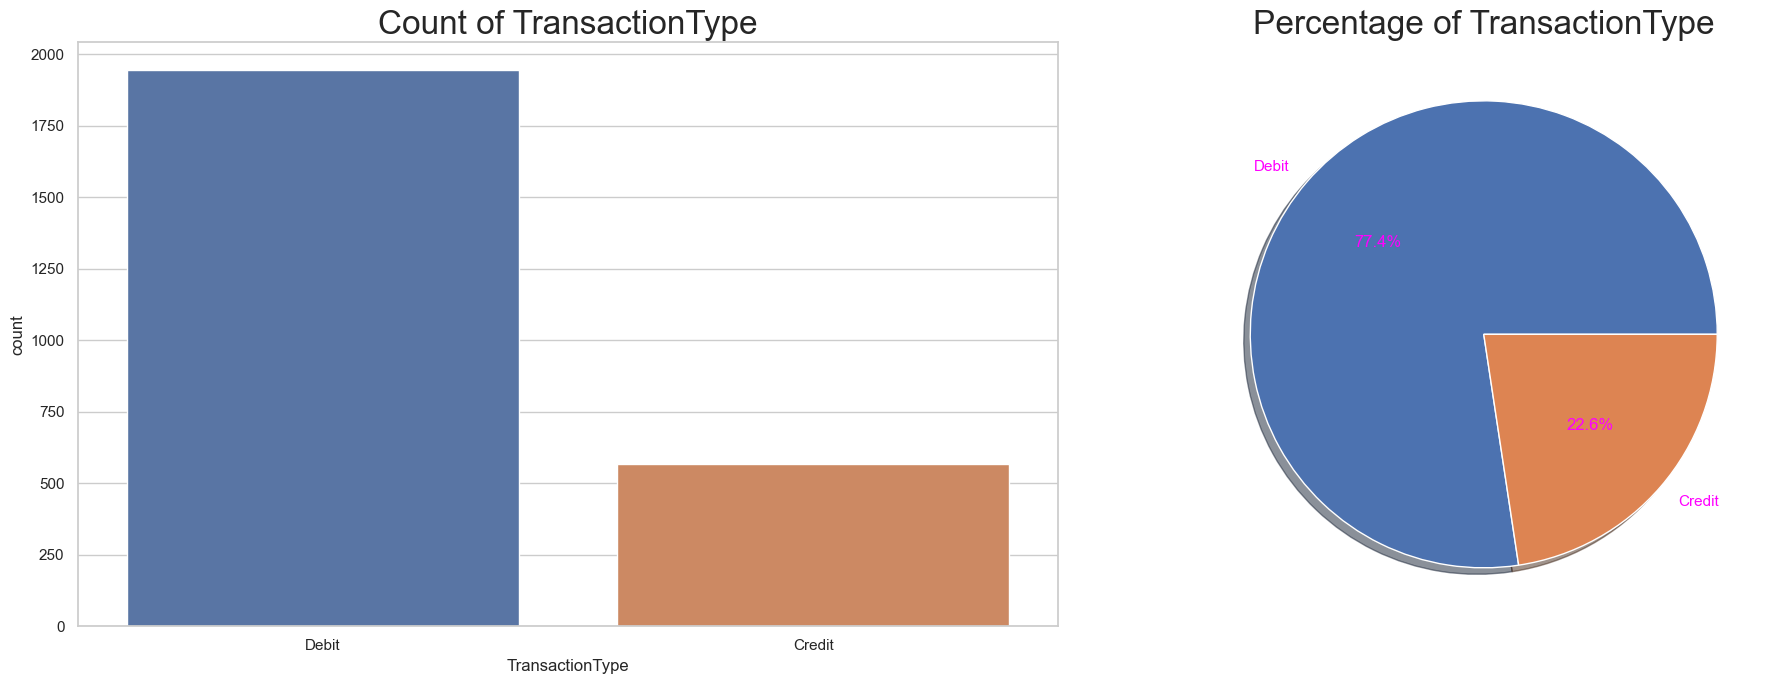

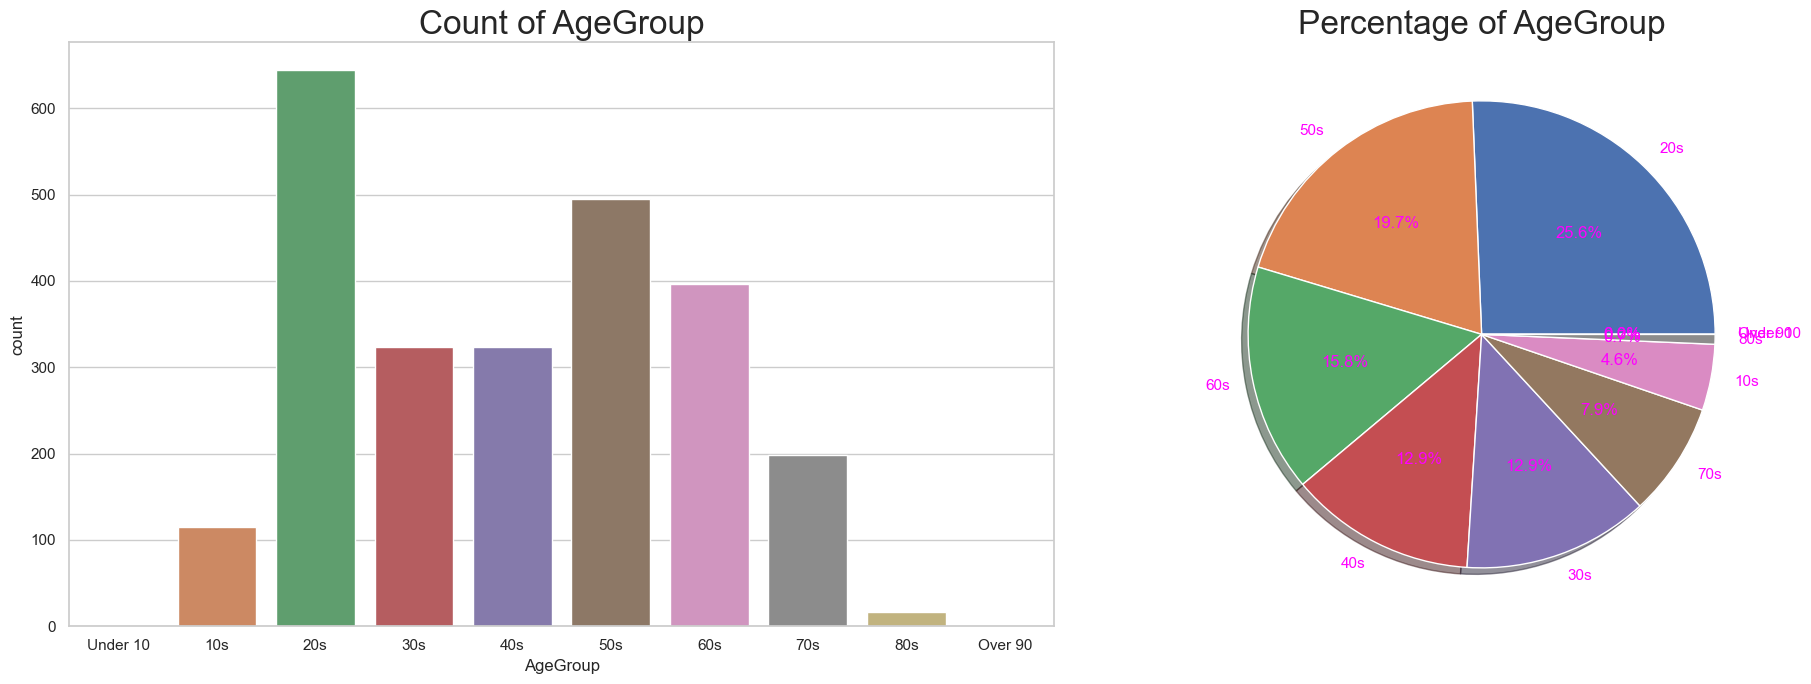

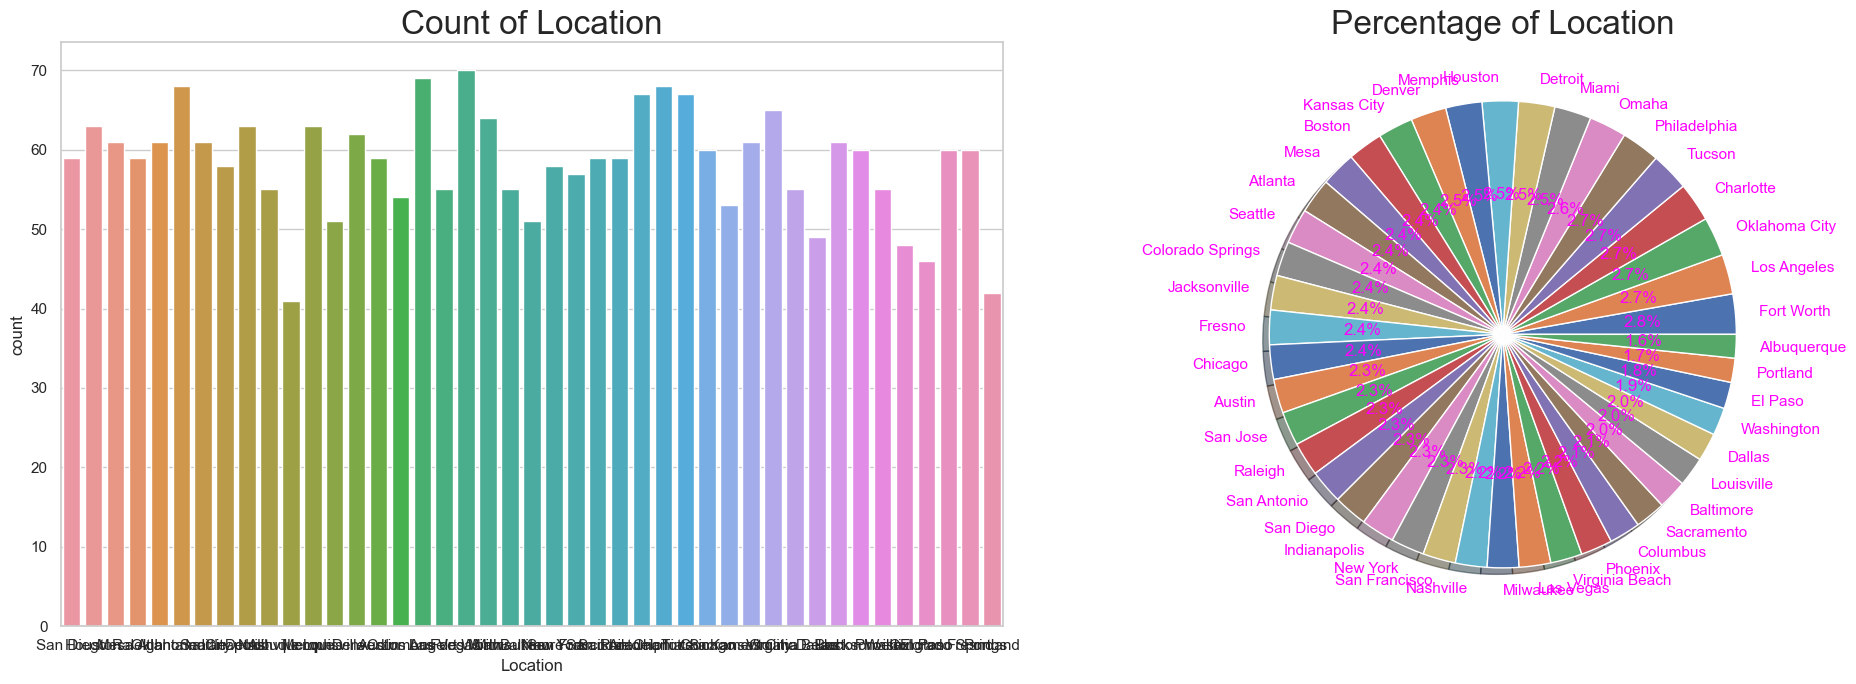

In [67]:
# 범주별 barplot과 pie chart 생성하기

categorical = ['Channel','CustomerOccupation', 'TransactionType', 'AgeGroup', 'Location']

for i in categorical:
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))
    sns.countplot(data=data, x=i, ax=ax[0])  
    channelpct = data[i].value_counts(normalize=True) * 100  
    ax[1].pie(channelpct, autopct='%0.1f%%', labels=channelpct.index, textprops=dict(color='magenta'), shadow=True)
    ax[0].set_title(f'Count of {i}', fontsize=24)
    ax[1].set_title(f'Percentage of {i}', fontsize=24)
    plt.tight_layout()
    plt.show()

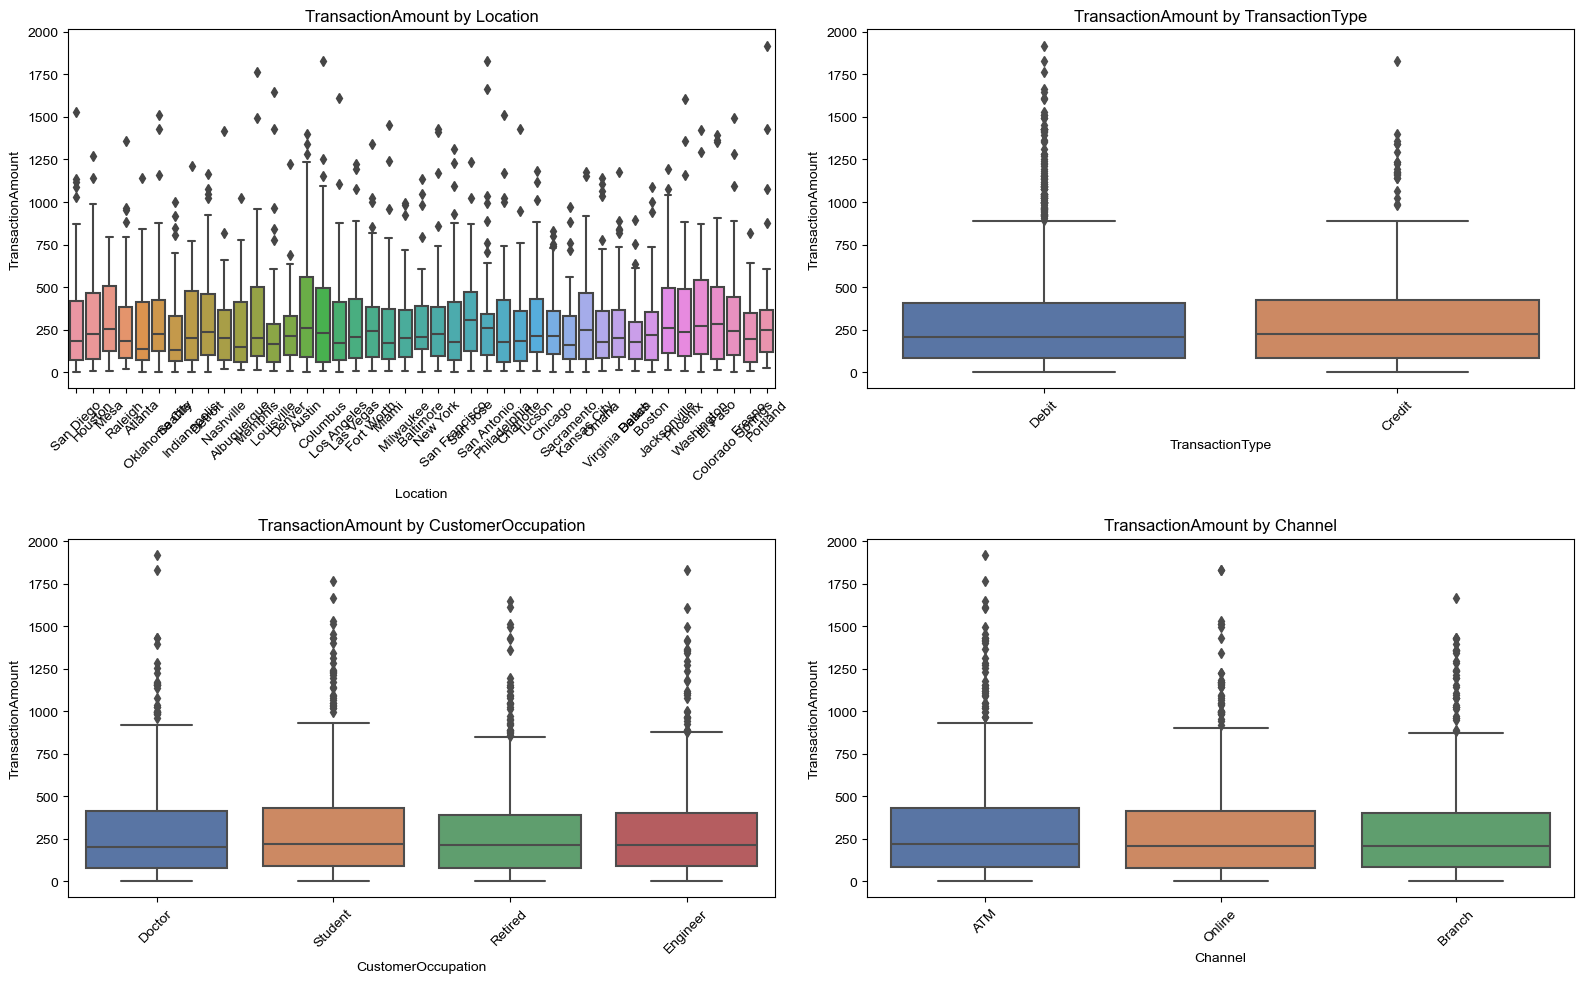

In [51]:
# boxplot

# 그룹화할 변수 목록
group_vars = ['Location', 'TransactionType', 'CustomerOccupation', 'Channel']

# subplot 크기 설정
fig, axes = plt.subplots(2, 2, figsize=(16, 10))  # 2x2 그리드

# 그래프 스타일 설정
sns.set(style="whitegrid")

# 각 그룹 변수에 대해 상자그림 그리기
for ax, var in zip(axes.flat, group_vars):
    sns.boxplot(x=var, y='TransactionAmount', data=data, ax=ax)
    ax.set_title(f'TransactionAmount by {var}')
    ax.tick_params(axis='x', rotation=45)  # x축 라벨 회전

plt.tight_layout()
plt.show()


# 범주형 변수를 수치형으로 변환

0       6
1       5
2       0
3       1
4       1
       ..
2507    2
2508    3
2509    4
2510    1
2511    1
Name: AgeGroup, Length: 2512, dtype: int32


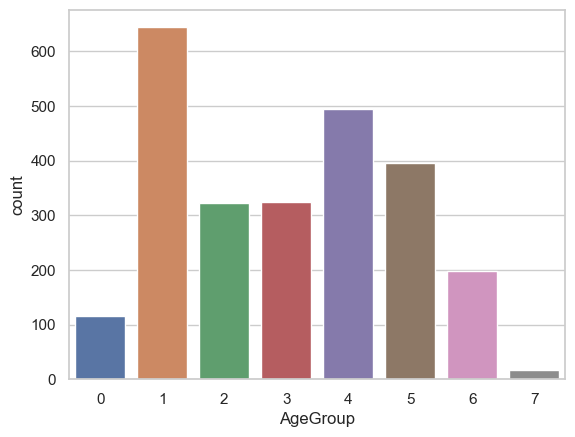

In [68]:
# agegroup을 수치형 변수로 변경
# 연령대는 순서의 개념이 있기 때문에 10대 -> 1, 20대 -> 2 와 같은 방법으로 수치화화
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
data['AgeGroup'] = le.fit_transform(data['AgeGroup'])
print(data['AgeGroup'])

sns.countplot(data=data, x='AgeGroup')
plt.show()

In [69]:
# Channel, Location 변수를 Channel별, Loation별 거래량 평균 비율로 대체

# Channel별 평균 거래량 계산
avg_amount_by_Channel = data.groupby('Channel')['TransactionAmount'].transform('median')

# 각 거래의 거래량을 그 거래의 채널(거래 기기)의 평균 거래량으로 나눔
data['Amount_Channel_Ratio'] = data['TransactionAmount'] / avg_amount_by_Channel

print(data['Channel'])
print(data['Amount_Channel_Ratio'])

# Location별 평균 거래량 계산
avg_amount_by_location = data.groupby('Location')['TransactionAmount'].transform('median')

# 각 거래의 거래량을 그 거래의 장소의 평균 거래량으로 나눔
data['Amount_Location_Ratio'] = data['TransactionAmount'] / avg_amount_by_location

print(data['Location'])
print(data['Amount_Location_Ratio'])

# Occupation별 평균 거래량 계산
avg_amount_by_Occupation = data.groupby('CustomerOccupation')['TransactionAmount'].transform('median')

# 각 거래의 거래량을 그 거래의 장소의 평균 거래량으로 나눔
data['Amount_Occupation_Ratio'] = data['TransactionAmount'] / avg_amount_by_Occupation

print(data['CustomerOccupation'])
print(data['Amount_Occupation_Ratio'])


0          ATM
1          ATM
2       Online
3       Online
4       Online
         ...  
2507    Branch
2508    Branch
2509    Branch
2510    Online
2511    Online
Name: Channel, Length: 2512, dtype: object
0       0.064350
1       1.718305
2       0.611189
3       0.892900
4       0.065092
          ...   
2507    4.193819
2508    1.232073
2509    0.140233
2510    0.900015
2511    1.176402
Name: Amount_Channel_Ratio, Length: 2512, dtype: float64
0              San Diego
1                Houston
2                   Mesa
3                Raleigh
4                Atlanta
              ...       
2507    Colorado Springs
2508              Tucson
2509           San Diego
2510              Denver
2511        Jacksonville
Name: Location, Length: 2512, dtype: object
0       0.076714
1       1.678219
2       0.501549
3       1.000000
4       0.099431
          ...   
2507    3.557462
2508    1.170879
2509    0.155877
2510    0.870055
2511    0.927893
Name: Amount_Location_Ratio, Length: 2512,

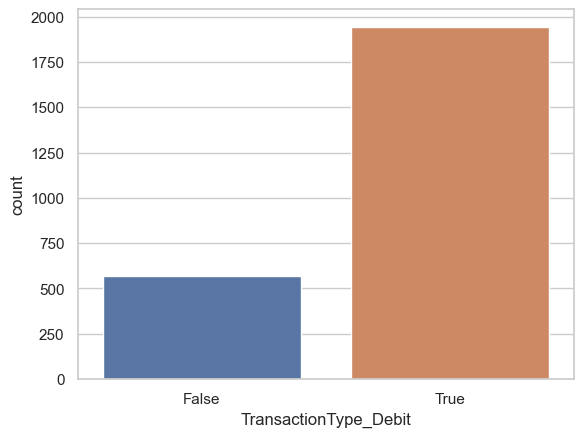

In [70]:
# Transaction Type의 원핫 인코딩
# 첫번째 열을 제거하여 다중공선성 문제 해결결
proc_data = pd.get_dummies(data, columns=['TransactionType'], drop_first=True)
proc_data.head()

sns.countplot(data=proc_data, x='TransactionType_Debit')
plt.show()

In [71]:
# 범주형 변수 컬럼 제거
proc_data = proc_data.drop(['CustomerOccupation', 'Location', 'Channel'], axis = 1)
proc_data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,DeviceID,IP Address,MerchantID,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroup,Amount_Channel_Ratio,Amount_Location_Ratio,Amount_Occupation_Ratio,TransactionType_Debit
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,D000380,162.198.218.92,M015,81,1,5112.21,2024-11-04 08:08:08,6,0.064350,0.076714,0.070772,True
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,D000051,13.149.61.4,M052,141,1,13758.91,2024-11-04 08:09:35,5,1.718305,1.678219,1.889799,True
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,D000235,215.97.143.157,M009,56,1,1122.35,2024-11-04 08:07:04,0,0.611189,0.501549,0.584838,True
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,D000187,200.13.225.150,M002,25,1,8569.06,2024-11-04 08:09:06,1,0.892900,1.000000,0.854404,True
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,D000308,65.164.3.100,M091,198,1,7429.40,2024-11-04 08:06:39,1,0.065092,0.099431,0.062286,False


# 일별, 월별 거래량 시각화

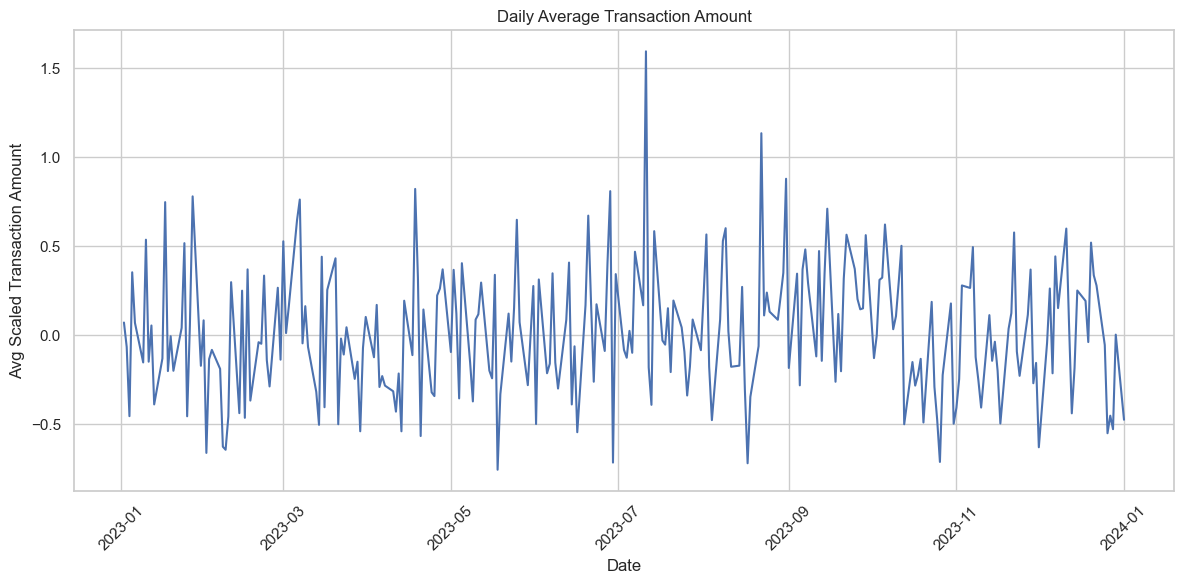

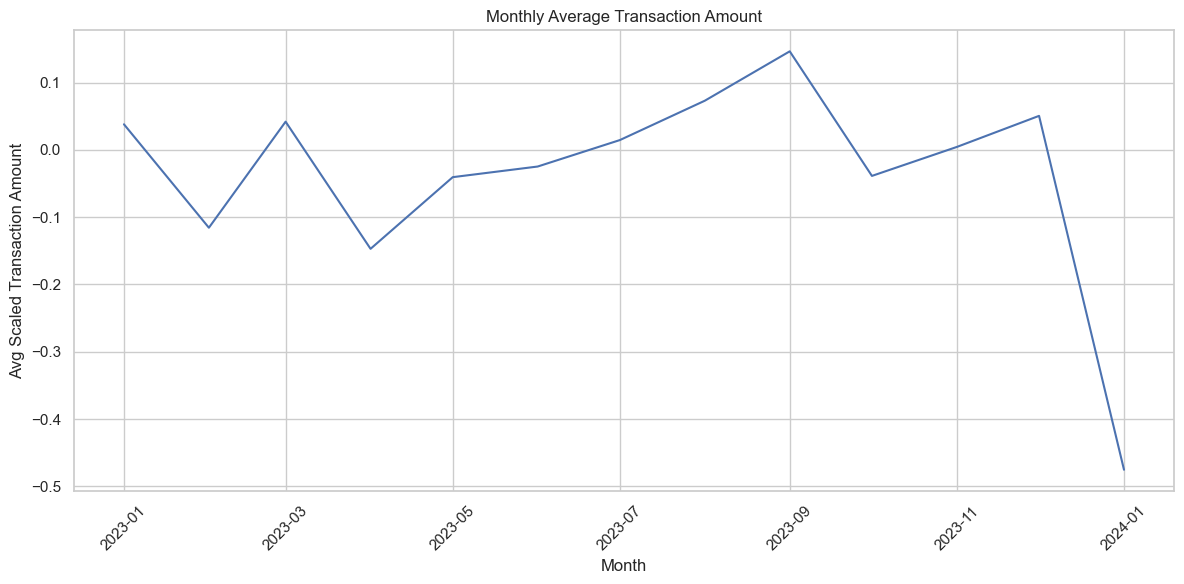

In [72]:
# 날짜를 datetime 형식으로 변환
scaled_data['TransactionDate'] = pd.to_datetime(scaled_data['TransactionDate']).dt.date

group = scaled_data.groupby('TransactionDate')['TransactionAmount'].mean()  # 날짜별 평균 집계

plt.figure(figsize=(12, 6))
plt.plot(group.index, group.values)  # x: 날짜, y: 평균 거래금액
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Avg Scaled Transaction Amount')
plt.title('Daily Average Transaction Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

# 날짜를 datetime 형식으로 변환
scaled_data['TransactionDate'] = pd.to_datetime(scaled_data['TransactionDate'])

# 월별로 변환 (Period 형식 → Timestamp로 변환)
scaled_data['Month'] = scaled_data['TransactionDate'].dt.to_period('M').dt.to_timestamp()

# 월별 평균 거래 금액
monthly_avg = scaled_data.groupby('Month')['TransactionAmount'].mean()

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg.index, monthly_avg.values)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Avg Scaled Transaction Amount')
plt.title('Monthly Average Transaction Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

# PCA

Explained Variance Ratio: [3.68731655e-01 1.66109870e-01 1.29459247e-01 1.24543553e-01
 1.20210408e-01 8.44939549e-02 6.22909302e-03 2.22218414e-04]
Cumulative Variance: [0.36873166 0.53484153 0.66430077 0.78884433 0.90905473 0.99354869
 0.99977778 1.        ]


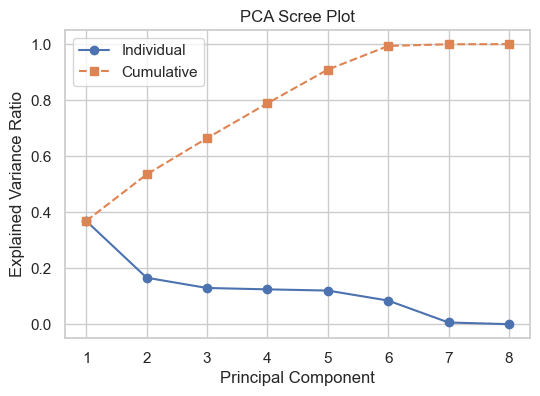

In [73]:
from sklearn.decomposition import PCA

# 1. 수치형 데이터 준비
numeric_df = proc_data[['TransactionDuration', 'LoginAttempts', 'AccountBalance',
                   'AgeGroup', 'Amount_Channel_Ratio', 'Amount_Location_Ratio',
                   'Amount_Occupation_Ratio', 'TransactionType_Debit']]

# 2. 표준화
scaler = StandardScaler()
scaled = scaler.fit_transform(numeric_df)

# 3. PCA 적용
pca = PCA()
pca.fit(scaled)

# 4. 설명된 분산 비율 출력
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)
print("Cumulative Variance:", explained_variance.cumsum())

# Scree plot (주성분별 설명력)
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', label='Individual')
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='s', linestyle='--', label='Cumulative')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Scree Plot')
plt.legend()
plt.grid(True)
plt.show()